<a href="https://colab.research.google.com/github/DavidAHerreraH/IAyRN_2025/blob/main/PIA_IA_y_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Producto Integrador de Aprendizaje**
*   2132219 Jorge David Tobias Olloqui IMC
*   2132092 David Alejandro Herrera Herrera IMC
*   2109374 Gabriel Emiliano Cuétero Meza IMC
*   2131987 Luis Raúl González Aguirre IMC
*   2012057 Angel Gabriel Jasso Barcena IMC


# UANL FIME
# Inteligencia Artificial y Redes Neuronales
# Modelo de deteccion de fatiga

Importamos librerias

In [ ]:
# importar librerías
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Convertimos nuestras imagenes a solo de un tipo, en este caso 96x96 para el procesamiento de los datos y ya que la camara acepta esta resolucion**

In [ ]:
from PIL import Image
import os

def recortar_y_redimensionar(ruta_img, nueva_res=(96, 96)):
    img = Image.open(ruta_img).convert("L")  # Convertir a escala de grises
    ancho, alto = img.size

    # Recorte cuadrado centrado
    lado = min(ancho, alto)
    izquierda = (ancho - lado) // 2
    superior = (alto - lado) // 2
    img_cortada = img.crop((izquierda, superior, izquierda + lado, superior + lado))

    # Redimensionar a 64x64
    img_final = img_cortada.resize(nueva_res)
    return img_final

def procesar_carpeta(origen, destino, nueva_res=(96, 96)):
    for root, dirs, files in os.walk(origen):
        for archivo in files:
            if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
                ruta_img = os.path.join(root, archivo)

                # Subcarpeta relativa (clase)
                subcarpeta = os.path.relpath(root, origen)
                carpeta_destino = os.path.join(destino, subcarpeta)
                os.makedirs(carpeta_destino, exist_ok=True)

                # Procesar imagen
                try:
                    img_procesada = recortar_y_redimensionar(ruta_img, nueva_res)
                    nombre_archivo = os.path.splitext(archivo)[0] + ".jpg"
                    ruta_guardado = os.path.join(carpeta_destino, nombre_archivo)
                    img_procesada.save(ruta_guardado)
                    print(f"Procesado: {ruta_img} → {ruta_guardado}")
                except Exception as e:
                    print(f"Error con {ruta_img}: {e}")

# 📂 Define tus carpetas aquí
carpeta_origen = "/content/drive/MyDrive/closed eyes 5"      # carpeta con subcarpetas por clase
carpeta_destino = "/content/drive/MyDrive/Bases de datos/Dormido"    # nueva carpeta para las imágenes 64x64 gris

procesar_carpeta(carpeta_origen, carpeta_destino)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Procesado: /content/drive/MyDrive/closed eyes 5/yo.mp4_0184.jpg → /content/drive/MyDrive/Bases de datos/Dormido/./yo.mp4_0184.jpg
Procesado: /content/drive/MyDrive/closed eyes 5/yo.mp4_0185.jpg → /content/drive/MyDrive/Bases de datos/Dormido/./yo.mp4_0185.jpg
Procesado: /content/drive/MyDrive/closed eyes 5/yo.mp4_0186.jpg → /content/drive/MyDrive/Bases de datos/Dormido/./yo.mp4_0186.jpg
Procesado: /content/drive/MyDrive/closed eyes 5/yo.mp4_0187.jpg → /content/drive/MyDrive/Bases de datos/Dormido/./yo.mp4_0187.jpg
Procesado: /content/drive/MyDrive/closed eyes 5/yo.mp4_0188.jpg → /content/drive/MyDrive/Bases de datos/Dormido/./yo.mp4_0188.jpg
Procesado: /content/drive/MyDrive/closed eyes 5/yo.mp4_0189.jpg → /content/drive/MyDrive/Bases de datos/Dormido/./yo.mp4_0189.jpg
Procesado: /content/drive/MyDrive/closed eyes 5/yo.mp4_0190.jpg → /content/drive/MyDrive/Bases de datos/Dormido/./yo.mp4_0190.jpg
Procesado: /content/dri

**nota: para no llenar el notebook de el mismo codigo, se uso este mismo solo cambiando las carpetas origen y destino para procesar las imagenes a la resolucion requerida**

**Ya con las imagenes hechas verificamos que las carpetas tengan la misma cantidad de imagenes 1 por 1**

In [ ]:
import os
carpeta = "/content/drive/MyDrive/Bases de datos/Cansado"
extensiones_validas = ('.jpg', '.jpeg', '.png', '.webp')
# Contar archivos que sean imágenes
imagenes = [f for f in os.listdir(carpeta) if f.lower().endswith(extensiones_validas)]
print(f"Total de imágenes en la carpeta: {len(imagenes)}")

Total de imágenes en la carpeta: 5216


**Ya con las imagenes preprocesadas para su uso en el entrenamiento del modelo, procederemos a llamar a cada una de estas en sus carpetas para así entrenar al modelo**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       991,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 996,291 (3.80 MB)

 Trainable params: 996,291 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 81s 200ms/step - accuracy: 0.7067 - loss: 0.6536 - val_accuracy: 0.8668 - val_loss: 0.2876
Epoch 2/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 83s 211ms/step - accuracy: 0.8926 - loss: 0.2490 - val_accuracy: 0.8716 - val_loss: 0.2809
Epoch 3/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 141s 208ms/step - accuracy: 0.9107 - loss: 0.2111 - val_accuracy: 0.9004 - val_loss: 0.2341
Epoch 4/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 137s 197ms/step - accuracy: 0.9160 - loss: 0.1961 - val_accuracy: 0.9109 - val_loss: 0.2145
Epoch 5/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 91s 230ms/step - accuracy: 0.9270 - loss: 0.1758 - val_accuracy: 0.9100 - val_loss: 0.2088
Epoch 6/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 136s 215ms/step - accuracy: 0.9311 - loss: 0.1650 - val_accuracy: 0.9084 - val_loss: 0.2275
Epoch 7/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 136s 199ms/step - accuracy: 0.9363 - loss: 0.1562 - val_accuracy: 0.9004 - val_loss: 0.2485
Epoch 8/20
395/395 ━━━━━━━━━━━━━━━━━━━━ 87s 221ms/step - accuracy: 0.9428 - los

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


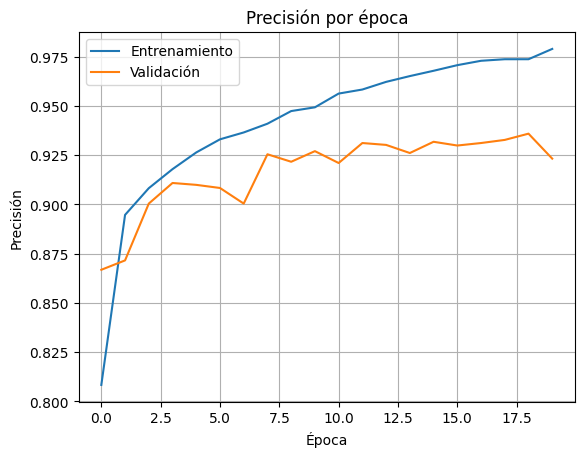

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
import matplotlib.pyplot as plt

# Ruta base del dataset
ruta_dataset = "/content/drive/MyDrive/Bases de datos"

# Leer imágenes y etiquetas
X_data = []
y_labels = []
tamano_img = (96, 96)  # ✅ Menor resolución

for clase in os.listdir(ruta_dataset):
    ruta_clase = os.path.join(ruta_dataset, clase)
    if not os.path.isdir(ruta_clase):
        continue
    for archivo in os.listdir(ruta_clase):
        if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            ruta_img = os.path.join(ruta_clase, archivo)
            img = load_img(ruta_img, color_mode='grayscale', target_size=tamano_img)
            img = img_to_array(img) / 255.0
            X_data.append(img)
            y_labels.append(clase)

# Convertir a arrays
X = np.array(X_data)
le = LabelEncoder()
y_encoded = le.fit_transform(y_labels)
y = to_categorical(y_encoded)

# División de datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo muy ligero (para ESP32)
modelo = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(96, 96, 1)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # Número de clases dinámico
])

modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

modelo.summary()

# Entrenamiento
history = modelo.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Guardar etiquetas
with open("/content/etiquetas.txt", "w") as f:
    for label in le.classes_:
        f.write(f"{label}\n")

# Convertir a TFLite con cuantización int8
def representative_dataset():
    for i in range(100):
        yield [X_train[i:i+1].astype(np.float32)]

converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()

# Guardar modelo TFLite
with open("/content/modelo3clases_96x96.tflite", "wb") as f:
    f.write(tflite_model)

# Graficar precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.title("Precisión por época")
plt.show()


**Ahora que nuestro modelo esta entrenado, pasaremos a hacer predicciones para cada una de las clases y asi podemos probar el modelo por nuestras propias manos y recursos**

**Escalamos, redimensionamos y normalizamos la imagen como lo hicimos con las imagenes para el entrenamiento**


📄 Imagen: chica.jpg
Cansado: 146.00
Despierto: 40.00
Dormido: 70.00


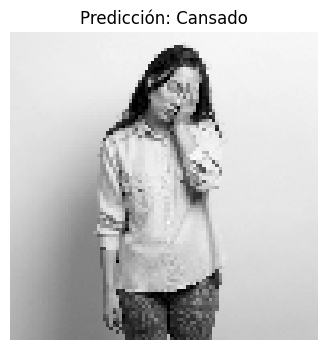


📄 Imagen: hermosa-mujer-en-sueter-blanco-casual-aislado-permanente-cara-tranquila-ojos-cerrados-sonrisa-linda.jpg
Cansado: 18.00
Despierto: 238.00
Dormido: 0.00


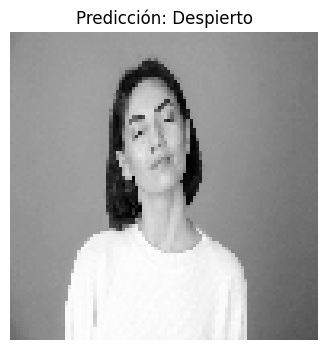


📄 Imagen: la-mujer-cansada-que-bosteza-cubriendo-la-boca-abierta-con-la-mano-necesita-descansar-la-trabajadora-joven-que-tiene-la-cabeza-somnolienta-no-puede-despertarse-con-insomnio-reaccion-en-cad.jpg
Cansado: 254.00
Despierto: 1.00
Dormido: 0.00


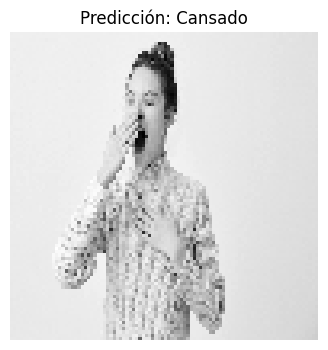


📄 Imagen: man-5522892_640.jpg
Cansado: 255.00
Despierto: 0.00
Dormido: 0.00


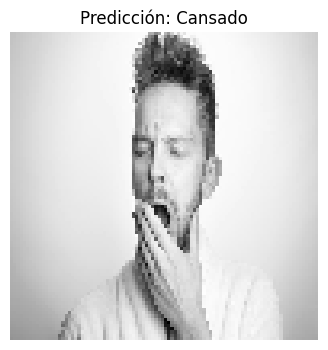


📄 Imagen: pexels-minan1398-654692.jpg
Cansado: 25.00
Despierto: 228.00
Dormido: 3.00


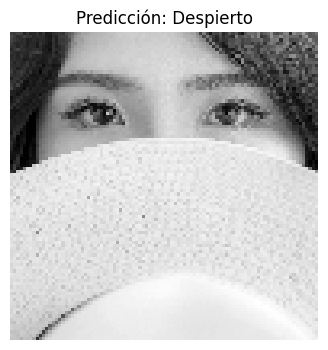


📄 Imagen: retrato-de-mujer-morena-en-su-coche.jpg
Cansado: 255.00
Despierto: 0.00
Dormido: 0.00


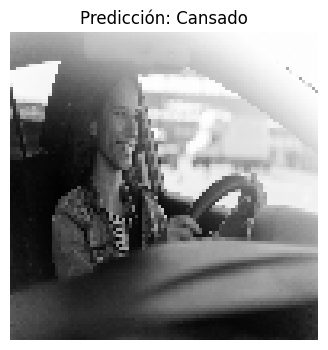

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
import joblib  # Para cargar etiquetas codificadas, si las guardaste

# --- Cargar modelo TFLite ---
interpreter = tf.lite.Interpreter(model_path="/content/modelo3clases_96x96.tflite")
interpreter.allocate_tensors()

# Obtener detalles de entrada y salida
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# --- Cargar etiquetas (de texto plano o LabelEncoder) ---

# Opción 1: Etiquetas como texto plano
with open("/content/etiquetas.txt", "r") as f:
    etiquetas = [line.strip() for line in f.readlines()]

# Opción 2: Si usaste LabelEncoder previamente, puedes cargarlo así:
# le = joblib.load('/content/label_encoder.pkl')
# etiquetas = le.classes_

# --- Parámetros ---
carpeta_imagenes = "/content/drive/MyDrive/imagenes prueba"
tamano_img = (96, 96)

# --- Procesar imágenes ---
for archivo in sorted(os.listdir(carpeta_imagenes)):
    if archivo.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
        ruta_img = os.path.join(carpeta_imagenes, archivo)

        # Preprocesar imagen
        img = load_img(ruta_img, color_mode='grayscale', target_size=tamano_img)
        img_array = img_to_array(img)

        # Normalización y casting según tipo de modelo
        if input_details[0]['dtype'] == np.uint8:
            img_array = img_array / 255.0 * 255.0
            img_array = img_array.astype(np.uint8)
        else:
            img_array = img_array / 255.0

        # Expandir dimensiones para batch
        img_array = np.expand_dims(img_array, axis=0)

        # Establecer entrada del modelo
        interpreter.set_tensor(input_details[0]['index'], img_array)

        # Ejecutar inferencia
        interpreter.invoke()

        # Obtener predicción
        pred = interpreter.get_tensor(output_details[0]['index'])[0]
        clase_pred = np.argmax(pred)
        pred_etiqueta = etiquetas[clase_pred]

        # Mostrar resultados
        print(f"\n📄 Imagen: {archivo}")
        for etiqueta, prob in zip(etiquetas, pred):
            print(f"{etiqueta}: {prob:.2f}")

        plt.figure(figsize=(5, 4))
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.axis('off')
        plt.title(f"Predicción: {pred_etiqueta}")
        plt.show()


**Para este proyecto use un software en linea que te permite subir el modelo y de ahi hacer el codigo que captura imagenes cada ciertos segundos**
https://edgeimpulse.com/


# Conclusiones


---

**En este proyecto nos enfrentamos con muchos desafios en el entrenamiento del modelo**

**Debido al poco espacio que el esp32-cam puede soportar dentro de su RAM y del limitado espacio que el software de Arduino IDE soporta, las complicaciones fueron varias al crear el modelo**

**En un principio el modelo iba a ser de 160x120 o de QQVGA, pero debido a que el modelo en tflite termino siendo demasiado pesado con 8.5 mb se tuvo que rediseñar el proyecto para que pudiera ser cargado en el programa.**

**De ahi empezamos a experimentar con 64x64, que aunque si conseguia el tamaño apropiado dejaba mucho que desear en cuestiones del entrenamiento del modelo pues solia fallar seguido o no distinguia bien las facciones de la cara debido a al baja resolución.**

**Ahi es cuando se nos ocurrio cambiarla a 96x96, que es una resolución aparte existente para este modelo, fue mucho más precisa que la de 64x64 pero a su vez nos enfrentamos con que seguia siendo demasiado pesada para este, ahi es donde tuvimos que bajar la densidad de las capas de convoluciones y hasta bajar las neuronas usadas en el entrenamiento, aunque ahorrando espacio perdiamos en el entrenamiento y solía fallar seguido, pero ya que cumplia con los requerimientos minimos de funcionar y estaba perfecto para el tamaño con poco menos de un mb nos quedamos con este modelo para poder cargarlo con ayuda de Edge Impulse.**

**Este proyecto nos dejo mucho por aprender y mucho por mejorar, pero nos sirvio mucho para practicar, Por su atención muchas gracias espero que este proyecto haya sido de su agrado.**